In [1]:
import pandas as pd
import numpy as np

# Load the data
mine_df = pd.read_csv('Mine.csv')

# 1. Handle missing values
# Fill missing Pulse with median
mine_df['Pulse'] = mine_df['Pulse'].fillna(mine_df['Pulse'].median())
# Fill missing Maxpulse with median
mine_df['Maxpulse'] = mine_df['Maxpulse'].fillna(mine_df['Maxpulse'].median())
# Fill missing Calories with mean
mine_df['Calories'] = mine_df['Calories'].fillna(mine_df['Calories'].mean())

# 2. Fix inconsistent date formats
# Remove trailing single quotes and fix malformed date
mine_df['Date'] = mine_df['Date'].str.replace("'", "")
mine_df.loc[mine_df['Date'] == '20231018', 'Date'] = '2023/10/18'
# Convert to datetime
mine_df['Date'] = pd.to_datetime(mine_df['Date'], errors='coerce')
# Drop rows with invalid dates
mine_df = mine_df.dropna(subset=['Date'])

# 3. Remove duplicate rows
mine_df = mine_df.drop_duplicates()

# 4. Fix wrong data
# Duration should be positive and reasonable (assuming max 8 hours = 480 minutes)
mine_df = mine_df[(mine_df['Duration'] > 0) & (mine_df['Duration'] <= 480)]
# Pulse should be less than Maxpulse
mine_df = mine_df[mine_df['Pulse'] <= mine_df['Maxpulse']]
# Calories should be positive
mine_df = mine_df[mine_df['Calories'] > 0]

# 5. No unnecessary columns in this dataset - all columns seem relevant

# Save cleaned data
mine_df.to_csv('Mine_cleaned.csv', index=False)

print("Mine.csv cleaning complete. Saved as Mine_cleaned.csv")
print(f"Original shape: {pd.read_csv('Mine.csv').shape}, Cleaned shape: {mine_df.shape}")

Mine.csv cleaning complete. Saved as Mine_cleaned.csv
Original shape: (31, 5), Cleaned shape: (17, 5)


In [2]:
import pandas as pd
import numpy as np

# Load the data
sales_df = pd.read_csv('Sales.csv')

# 1. Handle missing values
# Fill missing Customer Name with "Unknown"
sales_df['Customer Name'] = sales_df['Customer Name'].fillna("Unknown")
# Fill missing Quantity with 0 (assuming no purchase)
sales_df['Quantity'] = sales_df['Quantity'].fillna(0)
# Fill missing Unit Price with median
sales_df['Unit Price'] = sales_df['Unit Price'].fillna(sales_df['Unit Price'].median())
# Calculate missing Total Revenue (Quantity * Unit Price)
sales_df['Total Revenue'] = sales_df.apply(
    lambda row: row['Quantity'] * row['Unit Price'] if pd.isna(row['Total Revenue']) else row['Total Revenue'],
    axis=1
)

# 2. Fix inconsistent date formats
# Remove trailing single quotes and standardize format
sales_df['Order Date'] = sales_df['Order Date'].str.replace("'", "")
# Convert to datetime with multiple format attempts
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%d/%m/%Y', errors='coerce').fillna(
    pd.to_datetime(sales_df['Order Date'], format='%Y/%m/%d', errors='coerce')
)
# Drop rows with invalid dates
sales_df = sales_df.dropna(subset=['Order Date'])

# 3. Remove duplicate rows (keeping first occurrence)
sales_df = sales_df.drop_duplicates()

# 4. Fix wrong data
# Quantity should be non-negative
sales_df = sales_df[sales_df['Quantity'] >= 0]
# Unit Price should be positive
sales_df = sales_df[sales_df['Unit Price'] > 0]
# Fix negative revenue (from negative quantity)
sales_df['Total Revenue'] = sales_df['Total Revenue'].abs()

# 5. All columns seem relevant in this dataset

# Save cleaned data
sales_df.to_csv('Sales_cleaned.csv', index=False)

print("Sales.csv cleaning complete. Saved as Sales_cleaned.csv")
print(f"Original shape: {pd.read_csv('Sales.csv').shape}, Cleaned shape: {sales_df.shape}")

Sales.csv cleaning complete. Saved as Sales_cleaned.csv
Original shape: (8, 7), Cleaned shape: (6, 7)


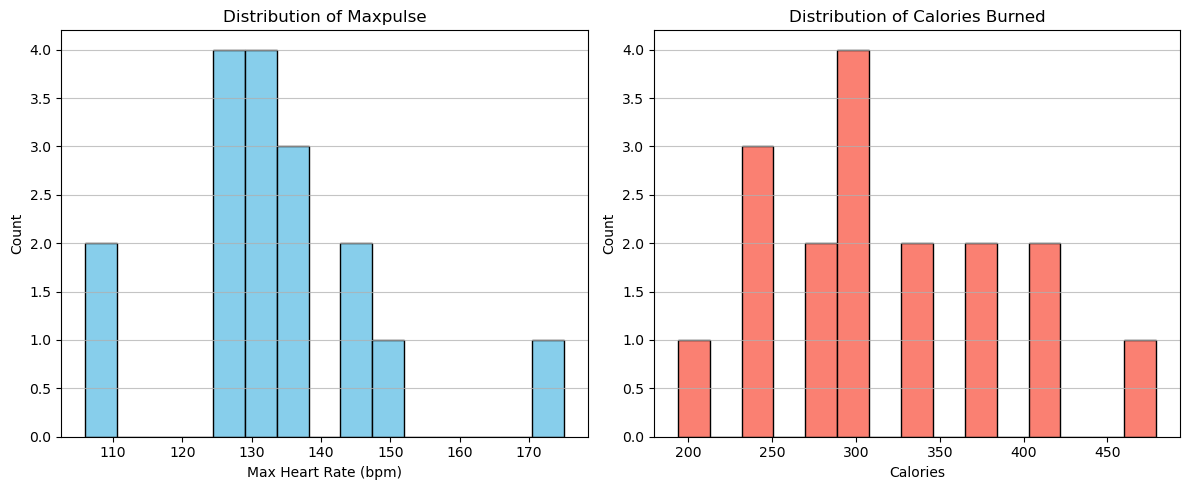

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('Mine_cleaned.csv')

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Histogram for Maxpulse
plt.subplot(1, 2, 1)
plt.hist(df['Maxpulse'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Maxpulse')
plt.xlabel('Max Heart Rate (bpm)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)

# Histogram for Calories
plt.subplot(1, 2, 2)
plt.hist(df['Calories'], bins=15, color='salmon', edgecolor='black')
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)

# Adjust layout and display
plt.tight_layout()
plt.show()


=== Initial Data Inspection ===
Shape: (229, 10)

Data Types:
Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume              object
Predicted_Close    float64
Currency_Pair       object
Signal              object
Confidence         float64
dtype: object

Missing Values:
Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

Erroneous Values:
Date               20
Open               21
High               18
Low                21
Close              20
Volume             21
Predicted_Close    21
Currency_Pair      21
Signal             20
Confidence         19
dtype: int64

=== Descriptive Statistics ===
                      Date        Open        High         Low       Close  \
count                  216  216.000000  2

C:\Users\HP\AppData\Local\Temp\ipykernel_31736\3636078833.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[price_cols] = df[price_cols].fillna(method='ffill')


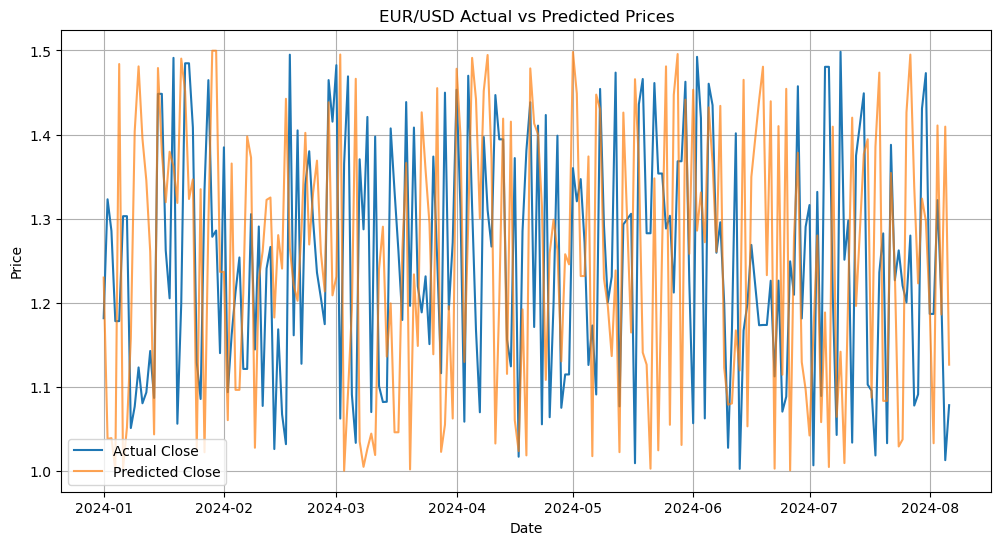

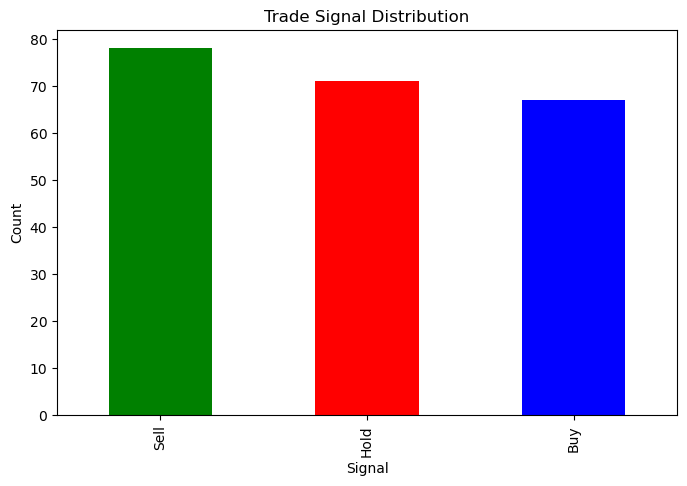

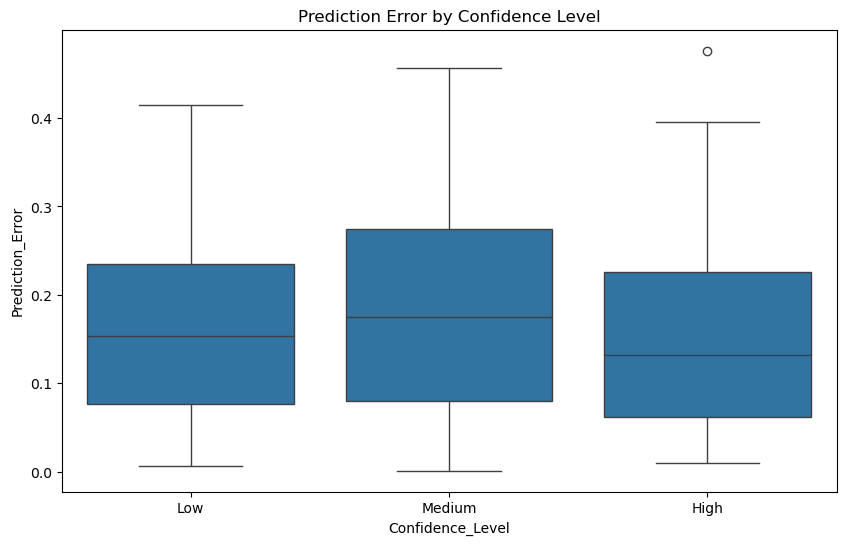


Signal Success Rate: 31.94%
Most Accurate Confidence Level: High

Cleaned data saved as 'cleaned_forex_predictions.csv'


C:\Users\HP\AppData\Local\Temp\ipykernel_31736\3636078833.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  best_conf = df.groupby('Confidence_Level')['Prediction_Error'].mean().idxmin()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('forex_predictions_data.csv')

## --------------------------
## 1. Initial Data Inspection
## --------------------------
print("\n=== Initial Data Inspection ===")
print(f"Shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nErroneous Values:")
print(df[df.eq('error').any(axis=1)].count())

## --------------------------
## 2. Data Cleaning
## --------------------------
# Replace 'error' with NaN
df.replace('error', np.nan, inplace=True)

# Convert numeric columns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle missing values
# For price data: fill with previous day's close (forward fill)
price_cols = ['Open', 'High', 'Low', 'Close', 'Predicted_Close']
df[price_cols] = df[price_cols].fillna(method='ffill')

# For Volume: fill with median
df['Volume'] = df['Volume'].fillna(df['Volume'].median())

# For Confidence: fill with 0.5 (neutral confidence)
df['Confidence'] = df['Confidence'].fillna(0.5)

# For Signal: fill with 'Hold' (neutral position)
df['Signal'] = df['Signal'].fillna('Hold')

# Remove rows with missing dates
df = df.dropna(subset=['Date'])

# Remove duplicate rows (keeping first occurrence)
df = df.drop_duplicates(subset=['Date', 'Currency_Pair'], keep='first')

# Fix data consistency
df = df[df['High'] >= df['Low']]  # High must be >= Low
df = df[df['Open'].between(0.5, 2.0)]  # Reasonable EUR/USD range
df = df[df['Volume'] > 0]  # Volume must be positive

## --------------------------
## 3. Feature Engineering
## --------------------------
# Calculate daily price change
df['Price_Change'] = df['Close'] - df['Open']

# Calculate prediction accuracy
df['Prediction_Error'] = abs(df['Predicted_Close'] - df['Close'])

# Categorize confidence levels
df['Confidence_Level'] = pd.cut(df['Confidence'],
                               bins=[0, 0.6, 0.8, 1],
                               labels=['Low', 'Medium', 'High'])

## --------------------------
## 4. Exploratory Analysis
## --------------------------
print("\n=== Descriptive Statistics ===")
print(df.describe())

# Visualization 1: Price Trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close', alpha=0.7)
plt.title('EUR/USD Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Visualization 2: Signal Distribution
plt.figure(figsize=(8, 5))
df['Signal'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Trade Signal Distribution')
plt.xlabel('Signal')
plt.ylabel('Count')
plt.show()

# Visualization 3: Confidence vs Prediction Error
plt.figure(figsize=(10, 6))
sns.boxplot(x='Confidence_Level', y='Prediction_Error', data=df)
plt.title('Prediction Error by Confidence Level')
plt.show()

## --------------------------
## 5. Key Findings
## --------------------------
# Signal success rate
successful_signals = df[
    ((df['Signal'] == 'Buy') & (df['Price_Change'] > 0)) |
    ((df['Signal'] == 'Sell') & (df['Price_Change'] < 0)) |
    ((df['Signal'] == 'Hold') & (abs(df['Price_Change']) < 0.005))
]

success_rate = len(successful_signals) / len(df) * 100
print(f"\nSignal Success Rate: {success_rate:.2f}%")

# Best performing confidence level
best_conf = df.groupby('Confidence_Level')['Prediction_Error'].mean().idxmin()
print(f"Most Accurate Confidence Level: {best_conf}")

## --------------------------
## 6. Save Cleaned Data
## --------------------------
df.to_csv('cleaned_forex_predictions.csv', index=False)
print("\nCleaned data saved as 'cleaned_forex_predictions.csv'")